# Week 7

## Kinnick Fox
## DSC530

All code before Exercise 7-1 is written by Allen B. Downey


In [39]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [52]:
import numpy as np

import random
import thinkstats2
import thinkplot

In [41]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [42]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [43]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [54]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [61]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

## Exercises

**Excercise 7-1:** Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

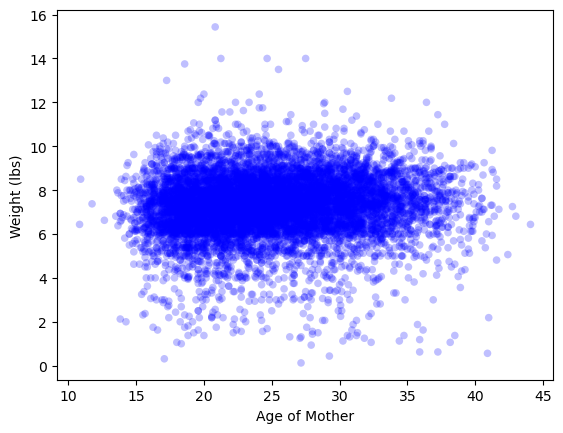

In [44]:
thinkplot.Scatter(live["agepreg"], live["totalwgt_lb"], alpha=.25)
thinkplot.Config(xlabel='Age of Mother',
                 ylabel='Weight (lbs)')

In [73]:
bins = np.arange(10, 45, 5)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

In [74]:
for i, group in groups:
    print(i, len(group))
mean_age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

1 58
2 1852
3 2962
4 2336
5 1393
6 401
7 36


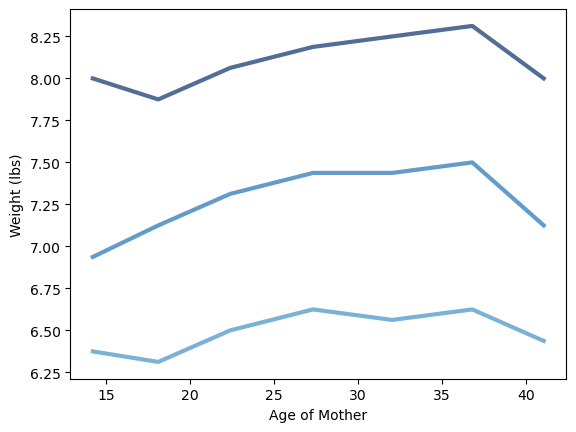

In [75]:
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    thinkplot.Plot(mean_age, weight_percentiles)
thinkplot.Config(xlabel='Age of Mother',
                 ylabel='Weight (lbs)')

In [48]:
SpearmanCorr(live["agepreg"], live["totalwgt_lb"])

0.09461004109658226

In [49]:
def PearsonCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='pearson')

In [50]:
PearsonCorr(live["agepreg"], live["totalwgt_lb"])

0.06883397035410903

The scatterplot does not offer much insight other than giving a rough idea of the average age of mothers when pregnant and some outliers for birth weights. The percentile plot reveals that babies born when the mother is 18 or younger tend to be smaller with an upwards trend when the mother is between 18 and 37 that then falls somewhat harshly after 37. Both correlation coefficients are within 0.1 of 0 meaning that the correlation is negligible and one variable does not necessarily affect the other.

**Exercise 8-1:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [69]:
def Biased(sample, iters, t):
    mu = 0
    sigma = 1
    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(sample)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    print('xbar mean error', t, ": ", MeanError(means, mu))
    print('median mean error', t, ": ", MeanError(medians, mu))

In [68]:
def MSE_check(sample, iters, t):
    mu = 0
    sigma = 1
    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(sample)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
    print('Biased RMSE ', t, ": ", RMSE(estimates1, sigma**2))
    print('Unbiased RMSE', t, ": ", RMSE(estimates2, sigma**2))

In [70]:
Biased(10,100,1)
Biased(10,1000,2)
Biased(10,10000,3)

xbar mean error 1 :  -0.02140516892696404
median mean error 1 :  0.007258341734924636
xbar mean error 2 :  -0.01520416520488434
median mean error 2 :  -0.00992349286144516
xbar mean error 3 :  0.0002874711605383348
median mean error 3 :  -0.00242859705119065


The more iterations the test takes the less lower the mean error falls for both xbar and median. This suggests that they are unbiased.

In [72]:
MSE_check(10,100,1)
MSE_check(10,1000,2)
MSE_check(10,10000,3)

Biased RMSE  1 :  0.43383251150096264
Unbiased RMSE 1 :  0.4819252192055825
Biased RMSE  2 :  0.4319954022026533
Unbiased RMSE 2 :  0.4659034535913668
Biased RMSE  3 :  0.4380435081059503
Unbiased RMSE 3 :  0.4740447703485487


It appears the biased estimator has a lower RMSE rating than the unbaised estimator reguardless of the amount of iterations.

**Exercise 8-2:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

In [105]:
def Sample_test(lamb, sample, iters):
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lamb, sample)
        lambhat = 1.0 / np.mean(xs)
        estimates.append(lambhat)

    stderr = RMSE(estimates, lamb)   
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('standard error', stderr)
    print('confidence interval', ci)
    thinkplot.Cdf(cdf)

    return stderr

standard error 0.7934097751871332
confidence interval (1.269393114057413, 3.6554866089521525)
standard error 0.20599011483267135
confidence interval (1.703885544399762, 2.372405763547981)
standard error 0.06427148492416583
confidence interval (1.8972432620231585, 2.1083291815430942)


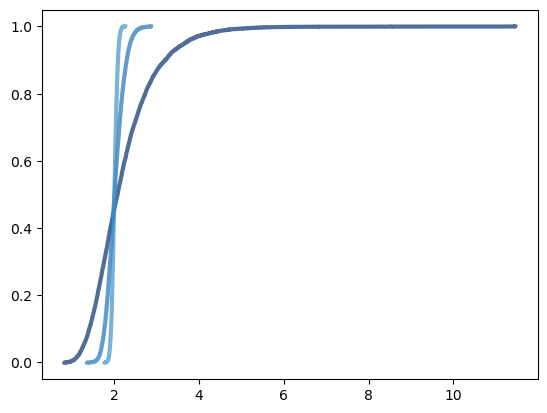

In [106]:
samp_size = [Sample_test(2,10,10000),
Sample_test(2,100,10000),
Sample_test(2,1000,10000),]

In [95]:
df = pd.DataFrame(list(zip(samp_size, [10,100,1000])))

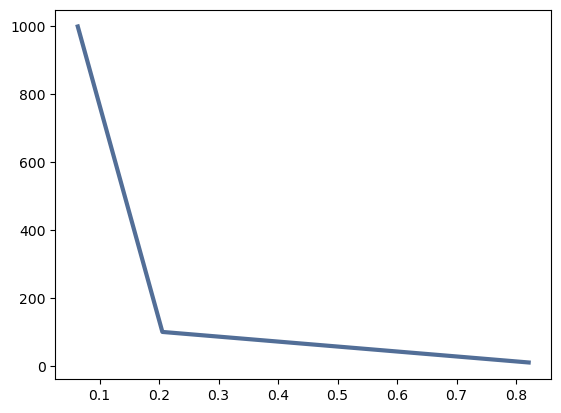

In [104]:
thinkplot.Plot(df[0],df[1])

The data shows that the larger the sample size the smaller the the standard error and the more condensed the "window" in which standard error exists is.